In [12]:
#data generation
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from faker import Faker
fake = Faker()

data_cards = [] 
id_card = 665999
loop = 0
card_pool = 10000

while loop < card_pool:
    id_card += 1
    prob_min = random.randint(50,60)
    prob_w = random.randint(10,20)
    prob_sp = 100 - (prob_min + prob_w)
    card_t = random.choices((0, 1, 2), weights = [prob_min, prob_w, prob_sp])[0]
 
    if card_t == 0:
        attack = (random.randint(0,4))
        defense = (random.randint(1,5))
        card={
                'ID': id_card,
                'Name': fake.first_name() + ' the ' + fake.job(),
                'Attack': int(attack),
                'Defense': int(defense),
                'Effect': 'None',
                'Cost': int(np.round((attack+defense)/2, decimals=0)),  
                'Type': 'Minion'}
    elif card_t == 1:
        attack = (random.randint(4,10))
        defense = (random.randint(5,10))
        card={
                'ID': id_card,
                'Name': fake.last_name_nonbinary() + ' of ' + fake.language_name(),
                'Attack': int(attack),
                'Defense': int(defense),
                'Effect': fake.sentence(nb_words=4),
                'Cost': int(round((attack+defense)/2, 0)),  
                'Type': 'Warlord'}
    else:
        card={
                'ID': id_card,
                'Name': fake.catch_phrase(),
                'Attack': 'NaN',
                'Defense': 'NaN',
                'Effect': fake.sentence(nb_words=5),
                'Cost': int(random.randint(2,7)),  
                'Type': 'Spell'}
    data_cards.append(card)
    loop += 1
df_cards=pd.DataFrame(data_cards)
df_cards
df_cards.to_csv("cards.csv")

Minion     5453
Spell      2933
Warlord    1614
Name: Type, dtype: int64

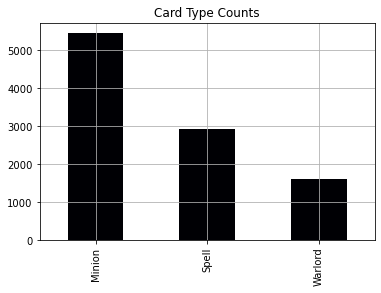

In [13]:
df_cards['Type'].value_counts().plot(kind = 'bar', title = 'Card Type Counts', grid = True, colormap = 'magma')
df_cards['Type'].value_counts()

In [14]:
df_num = df_cards[df_cards[['Attack']].applymap(np.isreal).all(1)]
avg_att = np.round(df_num["Attack"].mean(), decimals = 2)
print(f"The average attack of a card is {avg_att}.")
avg_def = np.round(df_num["Defense"].mean(), decimals = 2)
print(f"The average defense of a card is {avg_def}.")

The average attack of a card is 3.12.
The average defense of a card is 4.02.


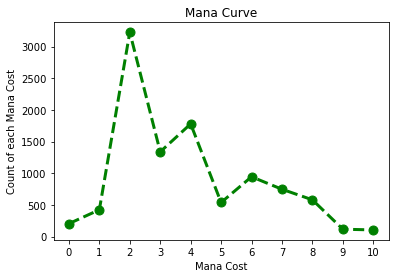

In [15]:
df_cost = df_cards.sort_values(by=['Cost'])
y_dim = df_cost['Cost'].value_counts().sort_index()
x_dim = df_cost['Cost'].unique()
plt.plot(x_dim, y_dim, color='green', marker='o', linestyle='dashed', linewidth=3, markersize=9)
plt.xlabel('Mana Cost')
plt.xticks(x_dim)
plt.ylabel('Count of each Mana Cost')
plt.title('Mana Curve')
plt.show()

In [16]:
#data generation with noise
data_cards = [] 
id_card = 665999
loop = 0
card_pool = 10000

while loop < card_pool:
    id_card += 1
    prob_min = random.randint(50,60)
    prob_w = random.randint(10,20)
    prob_sp = 100 - (prob_min + prob_w)
    card_t = random.choices((0, 1, 2), weights = [prob_min, prob_w, prob_sp])[0]
    
    noise_a = random.randint(4,10)
    noise_b = 100 - noise_a
    noise =random.choices((1,0), weights = (noise_a, noise_b))[0]
 
    if noise == 0:
        if card_t == 0:
            attack = (random.randint(0,4))
            defense = (random.randint(1,5))
            card={
                    'ID': id_card,
                    'Name': fake.first_name() + ' the ' + fake.job(),
                    'Attack': int(attack),
                    'Defense': int(defense),
                    'Effect': 'None',
                    'Cost': int(np.round((attack+defense)/2, decimals=0)),  
                    'Type': 'Minion'}
        elif card_t == 1:
            attack = (random.randint(4,10))
            defense = (random.randint(5,10))
            card={
                    'ID': id_card,
                    'Name': fake.last_name_nonbinary() + ' of ' + fake.language_name(),
                    'Attack': int(attack),
                    'Defense': int(defense),
                    'Effect': fake.sentence(nb_words=4),
                    'Cost': int(round((attack+defense)/2, 0)),  
                    'Type': 'Warlord'}
        else:
            card={
                    'ID': id_card,
                    'Name': fake.catch_phrase(),
                    'Attack': 'NaN',
                    'Defense': 'NaN',
                    'Effect': fake.sentence(nb_words=5),
                    'Cost': int(random.randint(2,7)),  
                    'Type': 'Spell'}
    if noise == 1:
        
        prob_error = random.randint(30,40)
        prob_null = random.randint(30,40)
        prob_dupl = 100 - (prob_min + prob_w)
        card_noise = random.choices((0, 1, 2), weights = [prob_error, prob_null, prob_dupl])[0]
        
        if card_noise == 0:
            if card_t == 0:
                card={
                        'ID': id_card,
                        'Name': fake.first_name() + ' the ' + fake.job(),
                        'Attack': 'NaN',
                        'Defense': 'NaN',
                        'Effect': 'NaN',
                        'Cost': 'NaN',  
                        'Type': 'Minion',
                        'Noise': 'Errors'}
            elif card_t == 1:
                card={
                        'ID': id_card,
                        'Name': fake.last_name_nonbinary() + ' of ' + fake.language_name(),
                        'Attack': 'NaN',
                        'Defense': 'NaN',
                        'Effect': 'NaN',
                        'Cost': 'NaN',  
                        'Type': 'Warlord',
                        'Noise': 'Errors'}
            else:
                card={
                        'ID': id_card,
                        'Name': fake.catch_phrase(),
                        'Attack': 10,
                        'Defense': 10,
                        'Effect': 'Nan',
                        'Cost': 10,  
                        'Type': 'Spell',
                        'Noise': 'Errors'}
                
        if card_noise == 1:
            if card_t == 0:
                card={
                        'ID': id_card,
                        'Name': fake.first_name() + ' the ' + fake.job(),
                        'Attack': 0,
                        'Defense': 0,
                        'Effect': 'NaN',
                        'Cost': 0,  
                        'Type': 'Minion',
                        'Noise': 'Nulls'}
            elif card_t == 1:
                card={
                        'ID': id_card,
                        'Name': fake.last_name_nonbinary() + ' of ' + fake.language_name(),
                        'Attack': 0,
                        'Defense': 0,
                        'Effect': 'NaN',
                        'Cost': 0,  
                        'Type': 'Warlord',
                        'Noise': 'Nulls'}
            else:
                card={
                        'ID': id_card,
                        'Name': fake.catch_phrase(),
                        'Attack': 'NaN',
                        'Defense': 'Nan',
                        'Effect': fake.sentence(nb_words=5),
                        'Cost': 0,  
                        'Type': 'Spell',
                        'Noise': 'Nulls'}
                
        if card_noise == 2:
            if card_t == 0:
                attack = (random.randint(0,4))
                defense = (random.randint(1,5))
                card={
                        'ID': id_card,
                        'Name': fake.first_name() + ' the ' + fake.job(),
                        'Attack': int(attack),
                        'Defense': int(defense),
                        'Effect': 'None',
                        'Cost': int(np.round((attack+defense)/2, decimals=0)),  
                        'Type': 'Minion',
                        'Noise': 'Duplicate'}
            elif card_t == 1:
                attack = (random.randint(4,10))
                defense = (random.randint(5,10))
                card={
                        'ID': id_card,
                        'Name': fake.last_name_nonbinary() + ' of ' + fake.language_name(),
                        'Attack': int(attack),
                        'Defense': int(defense),
                        'Effect': fake.sentence(nb_words=4),
                        'Cost': int(round((attack+defense)/2, 0)),  
                        'Type': 'Warlord',
                        'Noise': 'Duplicate'}
            else:
                card={
                        'ID': id_card,
                        'Name': fake.catch_phrase(),
                        'Attack': 'NaN',
                        'Defense': 'NaN',
                        'Effect': fake.sentence(nb_words=5),
                        'Cost': int(random.randint(2,7)),  
                        'Type': 'Spell',
                        'Noise': 'Duplicate'}
            data_cards.append(card)
            loop += 1
            
    data_cards.append(card)
    loop += 1
        
df_cards=pd.DataFrame(data_cards)
df_cards
df_cards.to_csv("cards_with_noise.csv")